In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
con =sqlite3.connect("C:\\Study\\1014\\1014\\NFL_Analysis\\nfl_2024.db")

sql_command = """
    select
    a.gameId,a.playId,quarter,down,yardsToGo,
    case when possessionTeam=homeTeamAbbr then "home" else "visitor" end as possessionTeam,
    case when yardlineSide=homeTeamAbbr then "home" else "visitor" end as yardlineSide,
    gameClock,preSnapHomeScore,preSnapVisitorScore,playResult,absoluteYardlineNumber,offenseFormation,defendersInTheBox,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded, homeFinalScore,visitorFinalScore

    from plays a
    inner join games  b 
    on a.gameid=b.gameid
    """
play=pd.read_sql_query(sql_command,con)
con.close()

In [4]:
play['gameClock']= (max(pd.to_datetime(play['gameClock'])) - pd.to_datetime(play['gameClock'])).astype('timedelta64[ms]')/10000

In [5]:
play.columns.tolist()

['gameId',
 'playId',
 'quarter',
 'down',
 'yardsToGo',
 'possessionTeam',
 'yardlineSide',
 'gameClock',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'playResult',
 'absoluteYardlineNumber',
 'offenseFormation',
 'defendersInTheBox',
 'homeTeamWinProbabilityAdded',
 'visitorTeamWinProbilityAdded',
 'homeFinalScore',
 'visitorFinalScore']

In [6]:
#play.to_csv('../game win prob/data/play.csv',index=False)

In [7]:
play.head()

,gameId,playId,quarter,down,yardsToGo,possessionTeam,yardlineSide,gameClock,preSnapHomeScore,preSnapVisitorScore,playResult,absoluteYardlineNumber,offenseFormation,defendersInTheBox,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,homeFinalScore,visitorFinalScore
0,2022100908,3537,4,1,10,visitor,visitor,2568.0,21,7,9,69,SHOTGUN,7.0,-0.006110,0.006110,21,15
1,2022091103,3126,4,1,10,visitor,visitor,2652.0,14,20,3,76,SHOTGUN,7.0,-0.010865,0.010865,20,23
2,2022091111,1148,2,2,5,visitor,visitor,2178.0,10,3,15,40,I_FORM,6.0,-0.037409,0.037409,24,19
3,2022100212,2007,3,2,10,visitor,visitor,648.0,19,16,7,47,SINGLEBACK,6.0,-0.002451,0.002451,32,23
4,2022091900,1372,2,1,10,home,visitor,2322.0,7,7,3,75,I_FORM,7.0,0.001053,-0.001053,41,7


In [8]:
#categorical data
categorical_cols = ['quarter',
 'down',
 'possessionTeam',
 'yardlineSide',
 'offenseFormation'
 
 ] 


play_final=pd.get_dummies(play, columns = categorical_cols)

In [9]:
play_final['home_win']=np.where(play_final.homeFinalScore>=play_final.visitorFinalScore,1,0)

In [10]:
play_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['gameId', 'playId', 'yardsToGo', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'playResult', 'absoluteYardlineNumber',
       'defendersInTheBox', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'homeFinalScore', 'visitorFinalScore',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'quarter_5',
       'down_1', 'down_2', 'down_3', 'down_4', 'possessionTeam_home',
       'possessionTeam_visitor', 'yardlineSide_home', 'yardlineSide_visitor',
       'offenseFormation_EMPTY', 'offenseFormation_I_FORM',
       'offenseFormation_JUMBO', 'offenseFormation_PISTOL',
       'offenseFormation_SHOTGUN', 'offenseFormation_SINGLEBACK',
       'offenseFormation_WILDCAT', 'home_win'],
      dtype='object')>

In [11]:
for col in play_final.columns.tolist():
    val_col=[]
    na_prc= play_final[col].isnull().sum()/len(play_final[col])
    print(col, str(na_prc))


gameId 0.0
playId 0.0
yardsToGo 0.0
gameClock 0.0
preSnapHomeScore 0.0
preSnapVisitorScore 0.0
playResult 0.0
absoluteYardlineNumber 0.0
defendersInTheBox 0.0004004485023226013
homeTeamWinProbabilityAdded 0.0
visitorTeamWinProbilityAdded 0.0
homeFinalScore 0.0
visitorFinalScore 0.0
quarter_1 0.0
quarter_2 0.0
quarter_3 0.0
quarter_4 0.0
quarter_5 0.0
down_1 0.0
down_2 0.0
down_3 0.0
down_4 0.0
possessionTeam_home 0.0
possessionTeam_visitor 0.0
yardlineSide_home 0.0
yardlineSide_visitor 0.0
offenseFormation_EMPTY 0.0
offenseFormation_I_FORM 0.0
offenseFormation_JUMBO 0.0
offenseFormation_PISTOL 0.0
offenseFormation_SHOTGUN 0.0
offenseFormation_SINGLEBACK 0.0
offenseFormation_WILDCAT 0.0
home_win 0.0


In [12]:
play_final.shape,play_final.dropna().shape

((12486, 34), (12481, 34))

In [13]:
play_final.dropna(inplace=True)

In [14]:
col_to_drop=['gameId', 'playId', 'homeTeamWinProbabilityAdded','visitorTeamWinProbilityAdded', 'homeFinalScore', 'visitorFinalScore']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale= ['yardsToGo','gameClock','preSnapHomeScore','preSnapVisitorScore','playResult', 'absoluteYardlineNumber','defendersInTheBox']
play_final[col_to_scale]= scaler.fit_transform(play_final[col_to_scale])

play_final_scale= play_final.drop(col_to_drop, axis=1)

In [16]:
play_final_scale.head()

,yardsToGo,gameClock,preSnapHomeScore,preSnapVisitorScore,playResult,absoluteYardlineNumber,defendersInTheBox,quarter_1,quarter_2,quarter_3,...,yardlineSide_home,yardlineSide_visitor,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,home_win
0,0.243243,0.476085,0.428571,0.145833,0.440252,0.591837,0.6,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0.243243,0.491657,0.285714,0.416667,0.402516,0.663265,0.6,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.108108,0.403782,0.204082,0.062500,0.477987,0.295918,0.5,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0.243243,0.120133,0.387755,0.333333,0.427673,0.367347,0.5,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,0.243243,0.430478,0.142857,0.145833,0.402516,0.653061,0.6,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [17]:
X = play_final_scale.drop(['home_win'], axis=1)
y = play_final_scale[['home_win']]

In [18]:
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_auc_score

def calculate_auc(model, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_scores = []
    accuracy_score=[]
    
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = (X.iloc[train_index], 
                                            X.iloc[test_index], 
                                            y.iloc[train_index], 
                                            y.iloc[test_index])

        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        
        auc = roc_auc_score(y_test, y_pred)
        auc_scores.append(auc)
        
        acc=model.score(X_test,y_test)
        accuracy_score.append(acc)
    
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    #print("AUC scores:", auc_scores)
    print("Mean AUC:", mean_auc)
    print("Standard deviation of AUC:", std_auc)
    
    #print("Accuracy:", accuracy_score)
    print("Mean Acc:", np.mean(accuracy_score))
    print("Standard deviation of acc:", np.std(accuracy_score))
    return auc_scores


In [19]:
#n fold validaton for logmodel, svm and random forest

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


In [20]:
lr=LogisticRegression()
lr_auc=calculate_auc(lr, X, y, n_splits=10) 

Mean AUC: 0.7571653973522042
Standard deviation of AUC: 0.01304921262425364
Mean Acc: 0.6816767516577364
Standard deviation of acc: 0.010933533578347449


In [21]:
rf=RandomForestClassifier(n_estimators=40)
rf_auc=calculate_auc(rf, X, y, n_splits=10) 


Mean AUC: 0.8165144018027852
Standard deviation of AUC: 0.011268916246138974
Mean Acc: 0.7287082229886473
Standard deviation of acc: 0.01066407301076267


In [22]:
svm_model = svm.SVC(gamma='scale',probability=True)
svm_auc=calculate_auc(svm_model, X, y, n_splits=10) 

Mean AUC: 0.7503997517827481
Standard deviation of AUC: 0.015471560934610487
Mean Acc: 0.6797531615035618
Standard deviation of acc: 0.01188665959217971


In [23]:
clf = MLPClassifier(hidden_layer_sizes=(100),random_state=1, max_iter=100)
clf_auc=calculate_auc(clf, X, y, n_splits=10) 

Mean AUC: 0.765418701117967
Standard deviation of AUC: 0.010645359465736054
Mean Acc: 0.6842405976062902
Standard deviation of acc: 0.010682175845691045


In [24]:
ense_auc=[*lr_auc, *rf_auc,*svm_auc,*clf_auc]

In [25]:
np.mean(ense_auc),np.std(ense_auc)

(0.7723745630139262, 0.028986564694601685)

In [26]:
play_final.head()

,gameId,playId,yardsToGo,gameClock,preSnapHomeScore,preSnapVisitorScore,playResult,absoluteYardlineNumber,defendersInTheBox,homeTeamWinProbabilityAdded,...,yardlineSide_home,yardlineSide_visitor,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,home_win
0,2022100908,3537,0.243243,0.476085,0.428571,0.145833,0.440252,0.591837,0.6,-0.006110,...,0,1,0,0,0,0,1,0,0,1
1,2022091103,3126,0.243243,0.491657,0.285714,0.416667,0.402516,0.663265,0.6,-0.010865,...,0,1,0,0,0,0,1,0,0,0
2,2022091111,1148,0.108108,0.403782,0.204082,0.062500,0.477987,0.295918,0.5,-0.037409,...,0,1,0,1,0,0,0,0,0,1
3,2022100212,2007,0.243243,0.120133,0.387755,0.333333,0.427673,0.367347,0.5,-0.002451,...,0,1,0,0,0,0,0,1,0,1
4,2022091900,1372,0.243243,0.430478,0.142857,0.145833,0.402516,0.653061,0.6,0.001053,...,0,1,0,1,0,0,0,0,0,1


In [27]:
LAC_vs_JAX = play_final[play_final.gameId==2022092509]
CAR_vs_CLE = play_final[play_final.gameId==2022091101]

X_train= play_final[~play_final.gameId.isin([2022092509,2022091101])][X.columns]
y_train= play_final[~play_final.gameId.isin([2022092509,2022091101])][y.columns]


In [28]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [29]:
LAC_vs_JAX['home_win_pred_prob']= rf.predict_proba(LAC_vs_JAX[X.columns])[:,0]
CAR_vs_CLE['home_win_pred_prob']= rf.predict_proba(CAR_vs_CLE[X.columns])[:,0]

In [30]:
LAC_vs_JAX['visitor_win_pred_prob']= 1- LAC_vs_JAX['home_win_pred_prob']
CAR_vs_CLE['visitor_win_pred_prob']= 1- CAR_vs_CLE['home_win_pred_prob']


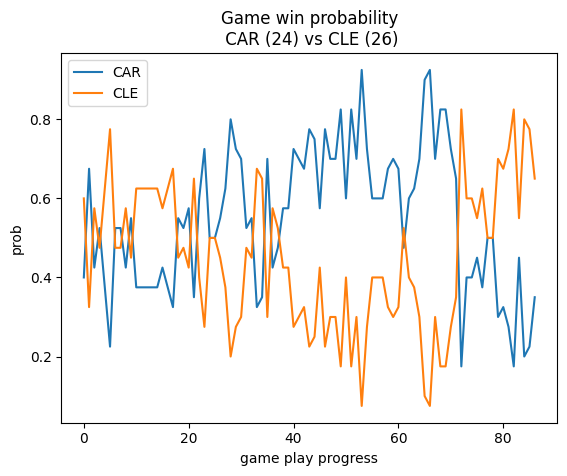

In [31]:
CAR_vs_CLE.sort_values(by=['playId'],inplace=True)
plt.plot(CAR_vs_CLE.home_win_pred_prob.values)
plt.plot(CAR_vs_CLE.visitor_win_pred_prob.values)

plt.title('Game win probability\n CAR (24) vs CLE (26)')
plt.ylabel('prob')
plt.xlabel('game play progress')
plt.legend(['CAR', 'CLE'], loc='upper left')
#plt.show()
plt.savefig('../game win prob/output/CAR_vs_CLE.png')


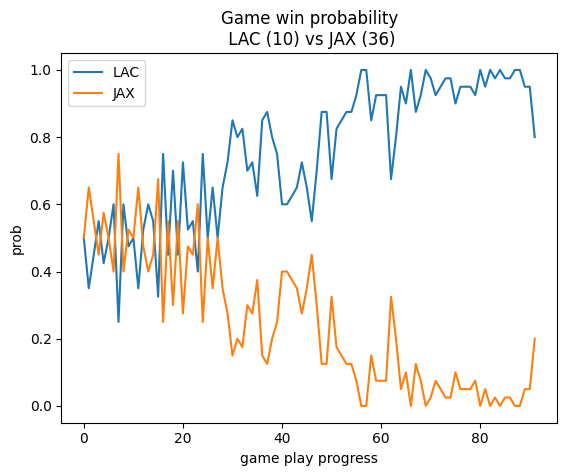

In [32]:
LAC_vs_JAX.sort_values(by=['playId'],inplace=True)
plt.plot(LAC_vs_JAX.home_win_pred_prob.values)
plt.plot(LAC_vs_JAX.visitor_win_pred_prob.values)

plt.title('Game win probability\n LAC (10) vs JAX (36)')
plt.ylabel('prob')
plt.xlabel('game play progress')
plt.legend(['LAC', 'JAX'], loc='upper left')
#plt.show()
plt.savefig('../game win prob/output/LAC_vs_JAX.png')
